In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
a = df[df['lunch'] == 'free/reduced'][['math score','reading score','writing score']]
b = df[df['lunch'] == 'standard'][['math score','reading score','writing score']]
a.describe()
#a.shape

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [4]:
b.describe()
#b.shape

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [5]:
df.query('lunch == "standard" & gender == "female"').head() #& = and, | = or

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [6]:
[i for i in list(df) if ('par' in i) or ('score' in i) ]

['parental level of education',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [7]:
df.filter(like = 'lev').head()

,parental level of education
0,bachelor's degree
1,some college
2,master's degree
3,associate's degree
4,some college


In [8]:
df.filter(like = '1', axis = 0).head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43
12,female,group B,high school,standard,none,65,81,73
13,male,group A,some college,standard,completed,78,72,70
14,female,group A,master's degree,standard,none,50,53,58
15,female,group C,some high school,standard,none,69,75,78
16,male,group C,high school,standard,none,88,89,86
17,female,group B,some high school,free/reduced,none,18,32,28
18,male,group C,master's degree,free/reduced,completed,46,42,46


In [9]:
df.filter(regex='re$', axis=1).head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [10]:
df.groupby('gender', as_index = False)\
.aggregate({'math score':['mean', 'count', 'std'],\
            'reading score':['std', 'mean', 'max']})

gender math score                  reading score                
                mean count        std           std       mean  max
0  female  63.633205   518  15.491453     14.378245  72.608108  100
1    male  68.728216   482  14.356277     13.931832  65.473029  100

In [11]:
df.sort_values(['gender', 'math score'], ascending = False).groupby('gender').head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [34]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
data.groupby('legs').count()['id']

legs
0    11
2    95
4     7
6     3
8     1
Name: id, dtype: int64

In [35]:
data1 = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
data1.head()
data1.groupby(['Type','Executor'],as_index=False)[['Salary']].mean()


,Type,Executor,Salary
0,A,Loopa,58.000000
1,A,Pupa,160.833333
2,B,Loopa,145.166667
3,B,Pupa,77.000000
4,C,Loopa,154.333333
5,C,Pupa,74.500000
6,D,Loopa,137.714286
7,D,Pupa,146.500000
8,E,Loopa,164.000000
9,E,Pupa,131.200000


In [49]:
data.groupby(['attack_type', 'primary_attr'],as_index = False).count().sort_values('id',ascending = False)

,attack_type,primary_attr,Unnamed: 0,id,legs,localized_name,name,roles
4,Ranged,int,40,40,40,40,40,40
2,Melee,str,35,35,35,35,35,35
0,Melee,agi,19,19,19,19,19,19
3,Ranged,agi,18,18,18,18,18,18
5,Ranged,str,3,3,3,3,3,3
1,Melee,int,2,2,2,2,2,2


In [50]:
df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
df.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [62]:
df.groupby('genus')['alanin'].aggregate({'alanin':['min','mean','max']}).loc[['Fucus']].round(2)

c:\users\rusek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


alanin            
         min  mean   max
genus                   
Fucus   0.35  3.57  6.64

In [87]:
import numpy as np
data = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
data.head()
df.groupby('group') \
    .agg({'citrate': 'var', 'sucrose': lambda x: x.max() - x.min(), 'glucose': 'count'}) \
    .round(2)

,citrate,sucrose,glucose
group,,,
brown,5.47,5.19,6
green,3.95,3.26,3
red,NaN,0.00,1


In [88]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020809923518>]],
      dtype=object)

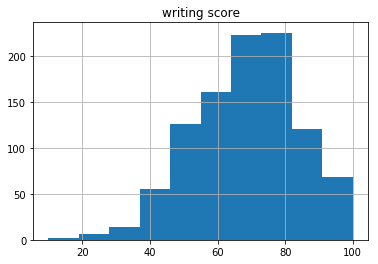

In [93]:
df.hist('writing score')

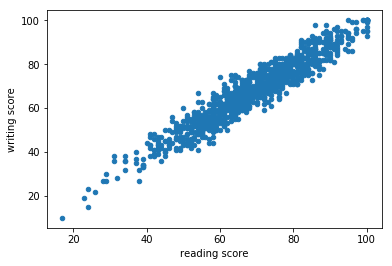

In [94]:
df.plot.scatter(x = 'reading score', y = 'writing score')

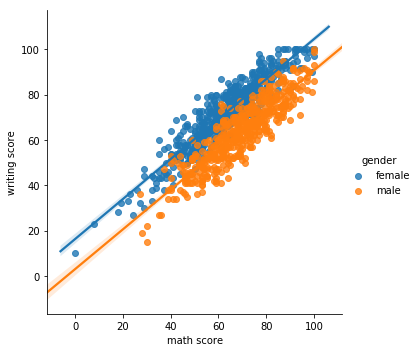

In [99]:
import seaborn as sns
ax = sns.lmplot(x = 'math score', y = 'writing score', hue = 'gender', data = df)#fit_reg = False - delete trend line
ax.

In [102]:
data = pd.read_csv('dataset_209770_6.txt', sep=" ")
data.head()

,x,y
0,1490.815182,914.754465
1,1506.603279,899.443780
2,1196.619342,1405.302524
3,1115.070804,1303.373205
4,1496.573277,912.725104


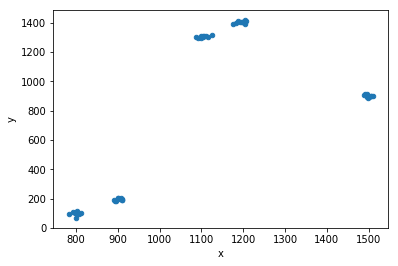

In [107]:
data.plot.scatter(x = 'x', y = 'y')

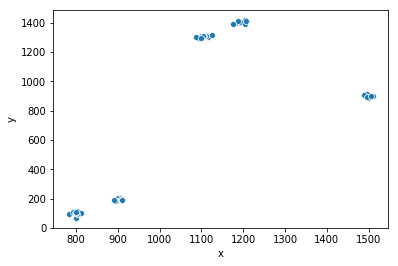

In [109]:
sns.scatterplot(data.iloc[:, 0], data.iloc[:, 1])

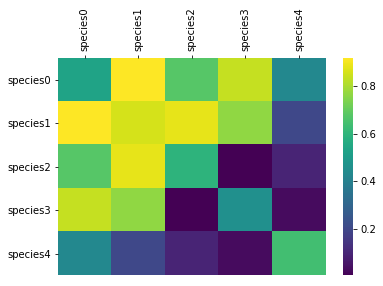

In [123]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv',index_col=0)
df.head()
g = sns.heatmap(df,cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [133]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv',index_col=0)
data.head()


,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


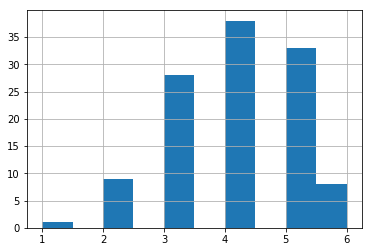

In [173]:
roles = data['roles']

d = [len(eval(roles[i])) for i in range(len(roles))]
num = pd.Series(d)
num.hist()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


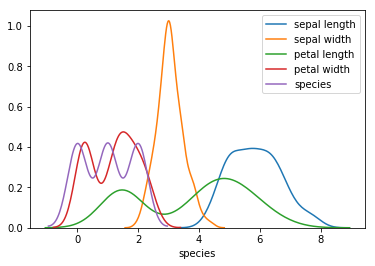

In [200]:

import matplotlib.pyplot as plt
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col = 0)
df.head()
for column in df:
    sns.distplot(df[column],kde_kws={ "label":column}, hist = False)
df.head()    

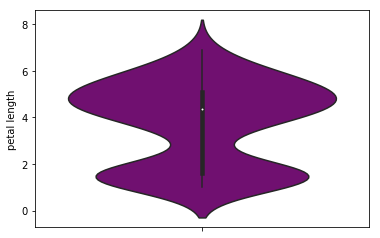

In [196]:
sns.violinplot(df['petal length'],orient  = 'v',color = 'purple')

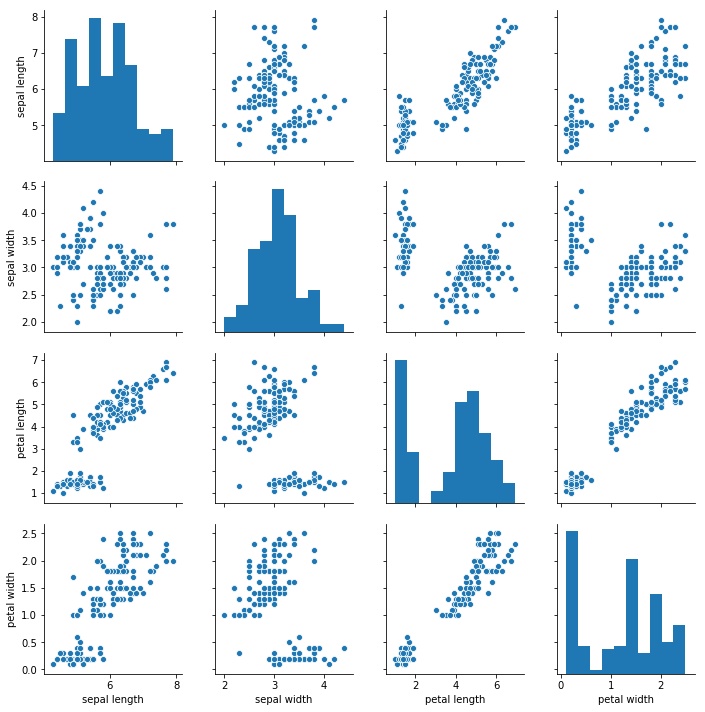

In [202]:
df = df.drop(['species'], axis = 1)
sns.pairplot(df)

In [221]:
d = {'type': ['A','A','B','B'], 'value': [10,14,12,23]}
my_data = pd.DataFrame( data = d)
#submition 2 
my_data = pd.DataFrame({
    'type': ['A'] * 2 + ['B'] * 2,
    'value': [10,14,12,23]
})


,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [245]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [244]:
subset_1 = my_stat[['V1','V3']].head(10)
subset_2 = my_stat.drop([0,4], axis = 0)[['V2','V4']]
subset_2
#another submitions
subset_1, subset_2 = my_stat.iloc[0:10, [0, 2]], my_stat.iloc[~my_stat.index.isin([0, 4]), [1, 3]]
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_2 = my_stat.iloc[:, [1, 3]].query('index != 0 and index != 4')

In [240]:
subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]


In [243]:
#V5 = V1 + V4
#V6 = натуральный логарифм переменной V2
my_stat['V5'] = my_stat['V1'] + my_stat['V4'] 
my_stat['V6'] = np.log(my_stat['V2'])
#sub 2
my_stat=my_stat.assign(V5 = my_stat.V1+my_stat.V4, V6 = np.log(my_stat.V2))

In [261]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat = my_stat.rename(index=str, columns={"V1": "session_value", "V2": "group","V3": "time","V4": "n_users"})


В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

In [301]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat['session_value'] = my_stat['session_value'].fillna(0)
median = my_stat[my_stat['n_users'] >= 0 ]['n_users'].median()
my_stat.loc[my_stat['n_users'] < 0,'n_users'] = median

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [306]:
mean_session_value_data = my_stat.groupby('group', as_index = False).agg({'session_value': 'mean'})\
.rename(index=str, columns={"session_value": "mean_session_value"})

,group,mean_session_value
0,A,0.8
1,B,0.8
